No handles with labels found to put in legend.


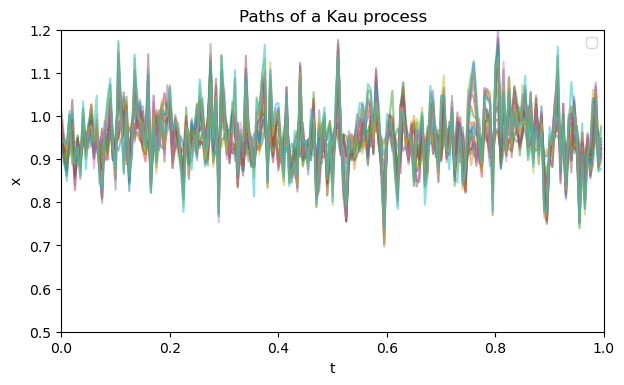

In [1]:
#!/usr/bin/python3
#Kau_Process.ipynb
#Parth Parakh
#purpose: Simulate a kau process process
#𝑆(𝑡)=𝑆(0)exp{(𝜇−1/2𝜎2)𝑡+𝜎𝑊(𝑡)}∏𝑖=1𝑁(𝑡)𝑉𝑖
#---------------------------------------------------------------------
#import modules
import numpy as np
import matplotlib.pyplot as plt
#----------------------------------------------------------------------

#Defining the parameters
npaths = 20000;           #number of paths
T = 1;                   #time horizon
nsteps = 200;            #number of time steps
dt = T/nsteps;           #time step
t = np.arange(0,T,dt);   #observation times
mu = 0.2; sigma = 0.3;   #model parameters
p = 0.4;e1 = 0.1;e2 = 0.2;
N = 2;S0 = 1;lambdaa = 0.5;

y = np.random.binomial(1,p,(N,1));
Y = y*np.random.exponential(e1,(N,1))-(1-y)*np.random.exponential(e2,(N,1));
V = np.exp(Y);

Z = 1;
for v1 in V:
     Z*=v1;

drift = (mu-0.5*(sigma**2))*dt;
diffusion = sigma*np.sqrt(dt)*np.random.normal(0,1,(nsteps,npaths));
dx = drift + diffusion;
dx[:0] = 0;
x = np.cumsum(dx,axis=1);
S = S0*np.exp(x)*Z;

#Compute the expected path
#EX = ( mu+lambdaa*(p/e1+(1-p)/e2) )*t;

plot1 = plt.figure(1,figsize=(7,4), dpi=100)
for i in range(0,20):
    plt.plot(t,S[:,i],alpha=0.5)

#plt.plot(t,EX,'black', label = 'Mean path')
plt.plot(t,np.mean(S,axis=1),'black');
plt.xlim(0,1)
plt.ylim(0.5,1.2);
plt.legend()
plt.xlabel('t')
plt.ylabel('x')
plt.title('Paths of a Kau process')
plt.show()
